# Suicide rate analyse

### Context

Close to 800 000 people die due to suicide every year, which is one person every 40 seconds. Suicide is a global phenomenon and occurs throughout the lifespan. Effective and evidence-based interventions can be implemented at population, sub-population, and individual levels to prevent suicide and suicide attempts. There are indications that for each adult who died by suicide there may have been more than 20 others attempting suicide.

### Objective
The objective of this case study is to find the patterns for increased suicide rates among different cohorts globally, across the socioeconomic spectrum by using exploratory data analysis.

### Data Dictionary
We will be using the dataset about suicide rates from 1985 to 2016. This dataset has the following attributes:

- country: Country
- year: Year
- sex: Sex (male or female)
- age: Suicide age range, ages divided into six categories
- suicides_no: number of suicides
- population: population of that sex, in that age range, in that country, and in that year
- suicides/100k pop: Number of suicides per 100k population
- gdp_for_year($): GDP of the country in that year in dollars
- gdp_per_capita($): Ratio of the country’s GDP and its population
- generation: Generation of the suicides in question, being possible 6 different categories

### Questions to explore
1. Is the suicide rate more prominent in some age categories than others?
2. Which countries have the most and the least number of suicides?
3. What is the effect of the population on suicide rates?
4. What is the effect of the GDP of a country on suicide rates?
5. What is the trend of suicide rates across all the years?
6. Is there a difference between the suicide rates of men and women?

**1. Loading the data set**

In [1]:
# Basic setup
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
# Load the dataset

data=pd.read_csv('master.csv')
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
# Checking for mixing data

def find_missing(df):
    missing=df.isnull().sum().sort_values(ascending=False)
    percentage=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    return pd.concat((missing, percentage), axis=1, keys=['Total', 'Percent'])

find_missing(data)

,Total,Percent
HDI for year,19456,0.699353
country,0,0.000000
year,0,0.000000
sex,0,0.000000
age,0,0.000000
suicides_no,0,0.000000
population,0,0.000000
suicides/100k pop,0,0.000000
country-year,0,0.000000
gdp_for_year ($),0,0.000000


## 1. Is the suicide rate more prominent in some age categories than others?

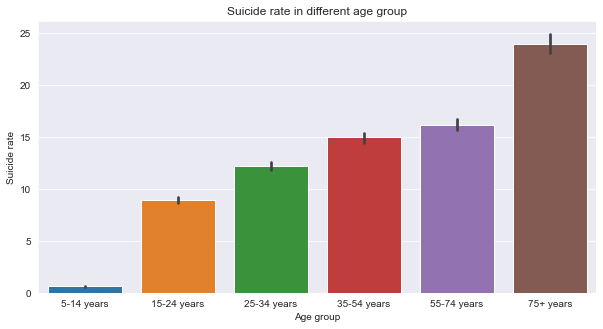

In [44]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x='age', y='suicides/100k pop', data=data, order=['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])
plt.title("Suicide rate in different age group")
plt.xlabel('Age group')
plt.ylabel('Suicide rate')
plt.savefig('1_Age_Suicide.jpg')

## 2. Which countries have the most and the least number of suicides?

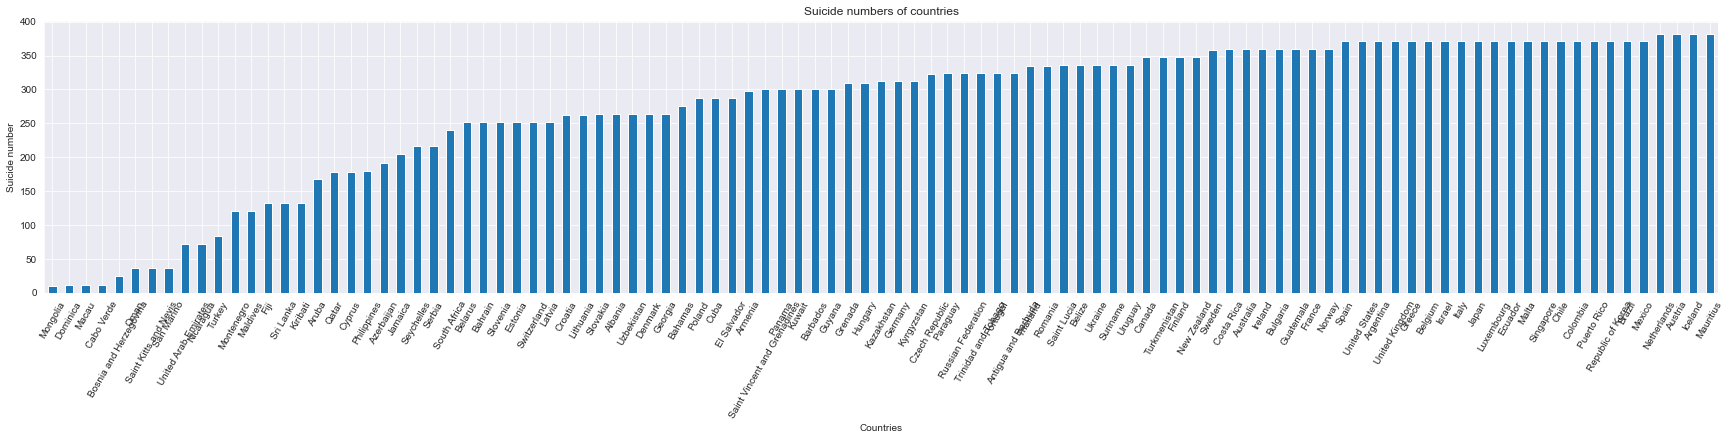

In [43]:
plt.figure(figsize=(30,5))
data.groupby(['country'])['suicides_no'].count().sort_values(ascending=True).plot(kind='bar', rot=60)

plt.title("Suicide numbers of countries")
plt.xlabel('Countries')
plt.ylabel('Suicide number')
plt.savefig('2_Cntr_Suicide.jpg')

## 3. What is the effect of the population on suicide rates?

<Figure size 7200x7200 with 0 Axes>

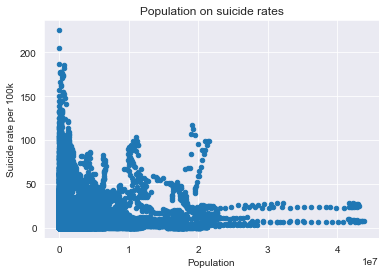

In [31]:
plt.figure(figsize=(100,100))
data.plot(x='population', y='suicides/100k pop', kind='scatter')
plt.title('Population on suicide rates')
plt.xlabel('Population')
plt.ylabel('Suicide rate per 100k')

plt.savefig('3_Pop_onSuicide.jpg')

## 4. What is the effect of the GDP of a country on suicide rates?

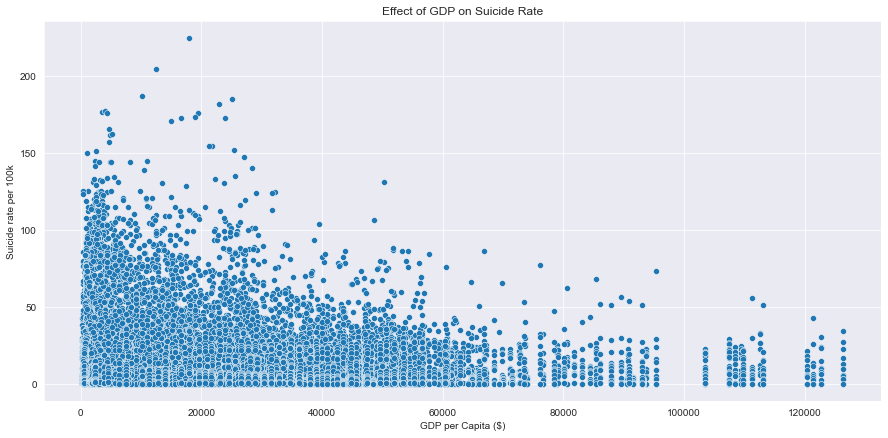

In [13]:
figure = plt.figure(figsize=(15,7))

g=sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=data) # scatter plot 
g.set_title('Effect of GDP on Suicide Rate')
g.set(xlabel='GDP per Capita ($)', ylabel='Suicide rate per 100k')
plt.savefig("4_Suicide_rate_GDP")

## 5. What is the trend of suicide rates across all the years?

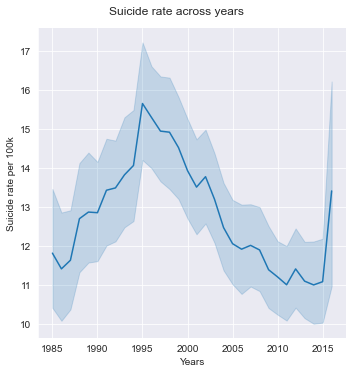

In [36]:

suicide_year = sns.relplot(kind='line', x='year', y='suicides/100k pop', data=data)
suicide_year.fig.suptitle('Suicide rate across years', y=1.03)
suicide_year.set(xlabel='Years', ylabel='Suicide rate per 100k')

plt.savefig("5_Suicide_rate_per_year")


## 6. Is there a difference between the suicide rates of men and women?

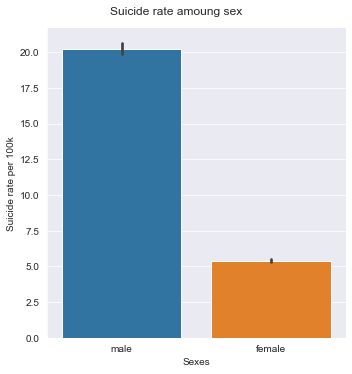

In [47]:
sex=sns.catplot(kind='bar', data=data, x='sex', y='suicides/100k pop')
sex.fig.suptitle('Suicide rate amoung sex', y=1.03)
sex.set(xlabel='Sexes', ylabel='Suicide rate per 100k')

plt.savefig("6_Suicide_rate_amoung_sex")
